In [17]:
import lifelines
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
import pandas as pd

In [31]:
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [32]:
data.shape

(1808, 12)

In [44]:
data['observed'].value_counts()

1    1468
0     340
Name: observed, dtype: int64

In [45]:
kmf = KaplanMeierFitter()

In [46]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

In [47]:
kmf.survival_function_.head(3)

,KM_estimate
timeline,
0.0,1.000000
1.0,0.721792
2.0,0.601973


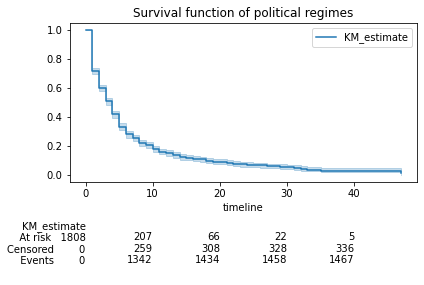

In [48]:
#kmf.survival_function_.plot()
kmf.plot_survival_function(at_risk_counts=True)
plt.title('Survival function of political regimes');

In [43]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1808,1808
1.0,555,503,52,0,1808
2.0,248,208,40,0,1253
3.0,195,152,43,0,1005
4.0,178,146,32,0,810
5.0,154,128,26,0,632
6.0,93,76,17,0,478
7.0,46,33,13,0,385
8.0,62,46,16,0,339


In [38]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,3.0,4.0


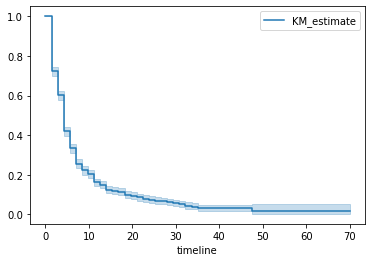

In [60]:
import numpy as np

# estimate probability for longer timeline

t = np.linspace(0, 70, 51)
kmf.fit(T, event_observed=E, timeline=t)
kmf.plot_survival_function()


In [61]:
from lifelines.datasets import load_waltons
waltons = load_waltons()
T, E = waltons['T'], waltons['E']

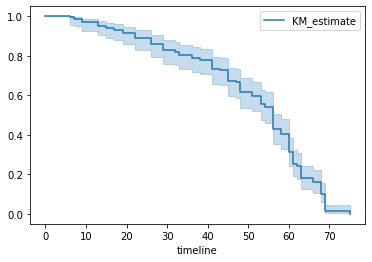

In [63]:
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.plot_survival_function()

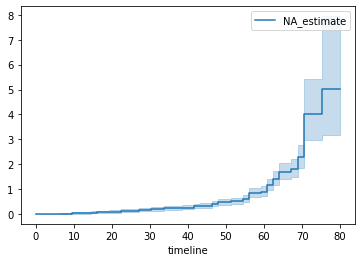

In [67]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

t = np.linspace(0, 80, 51)
naf.fit(T,event_observed=E, timeline=t)
naf.plot_cumulative_hazard()